# Temp Scan


In [2]:
# --- IMPORTS ---
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import sys
import traceback

# Add current directory to path to import overlappingGenes
sys.path.append(os.getcwd())
import overlappingGenes as og

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

In [13]:
# --- CONFIGURATION ---

# General
NUM_TRIALS = 200              # Number of independent trials per condition
MAX_ITERATIONS = 100_000_000 # Max steps for convergence check

# Benchmark 1: Scaling
OVERLAP_LENGTHS = og.get_optimal_overlaps(12, 102, 3) # Overlaps to test for scaling
print(OVERLAP_LENGTHS)

# Benchmark 2: Traces
TRACE_OVERLAP = 60           # Overlap length for trace plotting
TRACE_ITERATIONS = 1_000_000      # Number of iterations to plot for traces
TRACE_TRIALS = 5             # Number of trials to plot

# Benchmark 3: Diversity
DIVERSITY_OVERLAPS = [10, 40, 70, 95] # Overlaps to analyze for diversity
DIVERSITY_TRIALS = 20        # Number of sequences to generate per overlap

# Simulation Parameters
T1 = 0.8
T2 = 0.9

[12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102]


In [ ]:
# --- HELPER FUNCTIONS ---

def load_dca_params(base_dir, pf_name):
    params_file = os.path.join(base_dir, pf_name, f"{pf_name}_params.dat")
    print(f"Loading parameters from {params_file}...")
    J, h = og.extract_params(params_file)
    return (J, h)

def load_natural_energies_stats(base_dir, pf_name):
    filename = os.path.join(base_dir, pf_name, f"{pf_name}_naturalenergies.txt")
    energies = og.load_natural_energies(filename)
    return np.mean(energies), np.std(energies)

# Load Data Once
base_dir = os.getcwd()
dca_params_1 = load_dca_params(base_dir, "PF00004")
dca_params_2 = load_dca_params(base_dir, "PF00041")

mean_e1, std_e1 = load_natural_energies_stats(base_dir, "PF00004")
mean_e2, std_e2 = load_natural_energies_stats(base_dir, "PF00041")

len_h1 = len(dca_params_1[1])
len_h2 = len(dca_params_2[1])
prot1_len = int(len_h1 / 21)
prot2_len = int(len_h2 / 21)

print(f"\nTarget Ranges: PF00004 [{mean_e1-std_e1:.2f}, {mean_e1+std_e1:.2f}], PF00041 [{mean_e2-std_e2:.2f}, {mean_e2+std_e2:.2f}]")
print(f"Protein 1 length: {prot1_len}, Protein 2 length: {prot2_len}")
print(f"Natural energies target: PF00004 [{mean_e1:.2f}], PF00041 [{mean_e2:.2f}]")

Loading parameters from c:\Users\orson\OneDrive\Documents\OverlappingGenes\Project\PF00004\PF00004_params.dat...
Loading parameters from c:\Users\orson\OneDrive\Documents\OverlappingGenes\Project\PF00041\PF00041_params.dat...

Target Ranges: PF00004 [107.63, 184.13], PF00041 [103.02, 138.29]
Protein 1 length: 110, Protein 2 length: 74
Natural energies: PF00004 [145.88], PF00041 [120.66]


## Benchmark Temperatures

Generating convergence traces for Overlap 60 (5 trials)...


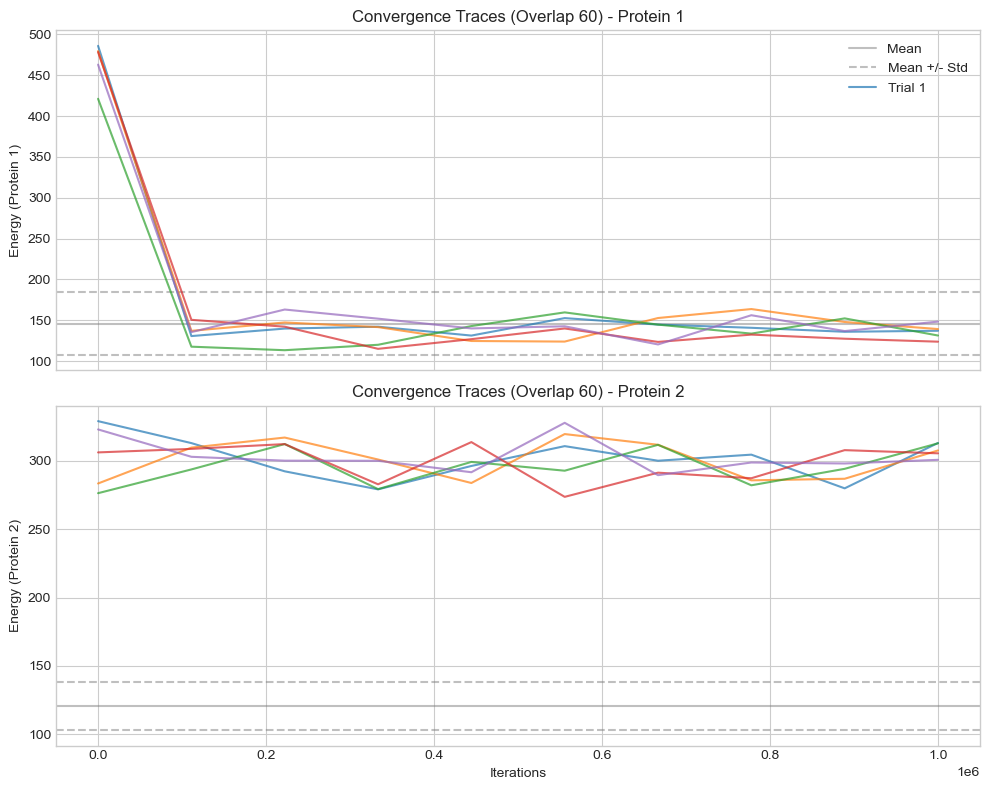

In [ ]:
# chcking that setting T high stil allows convergence for other gene
print(f"Generating convergence traces for Overlap {TRACE_OVERLAP} ({TRACE_TRIALS} trials)...")

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Thresholds
axs[0].axhline(y=mean_e1, linestyle='-', color='gray', alpha=0.5, label='Mean')
axs[0].axhline(y=mean_e1 + std_e1, linestyle='--', color='gray', alpha=0.5, label='Mean +/- Std')
axs[0].axhline(y=mean_e1 - std_e1, linestyle='--', color='gray', alpha=0.5)

axs[1].axhline(y=mean_e2, linestyle='-', color='gray', alpha=0.5)
axs[1].axhline(y=mean_e2 + std_e2, linestyle='--', color='gray', alpha=0.5)
axs[1].axhline(y=mean_e2 - std_e2, linestyle='--', color='gray', alpha=0.5)

for i in range(TRACE_TRIALS):
    initial_seq = og.initial_seq_no_stops(prot1_len, prot2_len, TRACE_OVERLAP, quiet=True)
    
    # Use the _int generator which returns history
    # whentosave=0.1 means 1000 saves per run (100/0.1). 
    
    final_seq, accepted, hist_e1, hist_e2, final_Es = og.overlapped_sequence_generator_int(
        dca_params_1, dca_params_2, initial_seq, 
        numberofiterations=TRACE_ITERATIONS, 
        whentosave=0.1, # Save frequently
        quiet=True,
        T1=T1, T2=T2
    )
    
    # Plot traces
    # Create x-axis based on length of history
    x_axis = np.linspace(0, TRACE_ITERATIONS, len(hist_e1))
    
    axs[0].plot(x_axis, hist_e1, alpha=0.7, label=f'Trial {i+1}' if i==0 else "")
    axs[1].plot(x_axis, hist_e2, alpha=0.7)

axs[0].set_ylabel('Energy (Protein 1)')
axs[0].set_title(f'Convergence Traces (Overlap {TRACE_OVERLAP}) - Protein 1')
axs[0].legend(loc='upper right')

axs[1].set_ylabel('Energy (Protein 2)')
axs[1].set_title(f'Convergence Traces (Overlap {TRACE_OVERLAP}) - Protein 2')
axs[1].set_xlabel('Iterations')

plt.tight_layout()
plt.show()

Starting temperature scan with 20 temperatures and 40 runs each...
Temp 0.7000: Average Dist = 31.7256 +/- 8.6716
Temp 0.7132: Average Dist = 29.9035 +/- 9.6436
Temp 0.7263: Average Dist = 27.1728 +/- 9.5169
Temp 0.7395: Average Dist = 23.3277 +/- 11.0618
Temp 0.7526: Average Dist = 21.5200 +/- 12.0146
Temp 0.7658: Average Dist = 24.1120 +/- 11.4291
Temp 0.7789: Average Dist = 17.8898 +/- 8.3758
Temp 0.7921: Average Dist = 15.6987 +/- 12.0617
Temp 0.8053: Average Dist = 15.6388 +/- 8.5624
Temp 0.8184: Average Dist = 16.0690 +/- 8.6610
Temp 0.8316: Average Dist = 14.0610 +/- 9.5049
Temp 0.8447: Average Dist = 14.0700 +/- 10.3813
Temp 0.8579: Average Dist = 11.9767 +/- 10.6662
Temp 0.8711: Average Dist = 15.1586 +/- 11.6491
Temp 0.8842: Average Dist = 21.3202 +/- 14.5938
Temp 0.8974: Average Dist = 21.8243 +/- 15.1777
Temp 0.9105: Average Dist = 25.8359 +/- 20.5630
Temp 0.9237: Average Dist = 30.5097 +/- 18.0935
Temp 0.9368: Average Dist = 34.3482 +/- 22.4599
Temp 0.9500: Average Dist = 

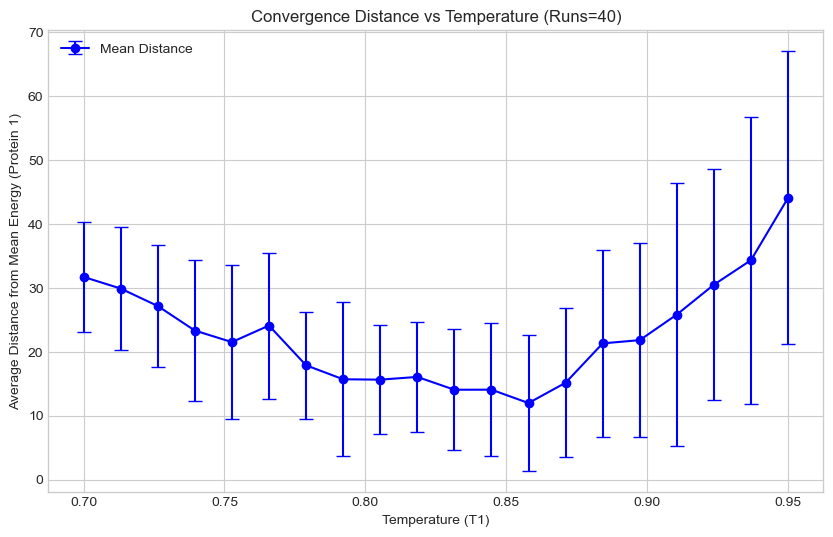

In [21]:
Temps = np.linspace(0.7,0.95,20)
Temp_overlap= 60
hi_T = 1000
no_runs = 40
Temp_iters = 250000

# Initialize storage for average distances and standard deviations
avg_distances = []
std_distances = []

print(f"Starting temperature scan with {len(Temps)} temperatures and {no_runs} runs each...")

# Loop through temperatures
for temp in Temps:
    distances = []
    
    # Loop through runs for this temperature
    for run in range(no_runs):
        initial_seq = og.initial_seq_no_stops(prot1_len, prot2_len, Temp_overlap, quiet=True)

        final_seq, accepted, hist_e1, hist_e2, final_Es = og.overlapped_sequence_generator_int(
            dca_params_1, dca_params_2, initial_seq, 
            numberofiterations=Temp_iters, 
            whentosave=0.1, 
            quiet=True,
            T1=temp, T2=hi_T)

        # Calculate distance from mean energy of Protein 1
        dist = np.absolute(mean_e1 - final_Es[0])
        distances.append(dist)
    
    # Calculate and store the average and standard deviation for this temperature
    avg_dist = np.mean(distances)
    std_dist = np.std(distances)
    
    avg_distances.append(avg_dist)
    std_distances.append(std_dist)
    
    print(f"Temp {temp:.4f}: Average Dist = {avg_dist:.4f} +/- {std_dist:.4f}")

# Plot the results with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(Temps, avg_distances, yerr=std_distances, marker='o', linestyle='-', color='b', capsize=5, label='Mean Distance')
plt.xlabel('Temperature (T1)')
plt.ylabel('Average Distance from Mean Energy (Protein 1)')
plt.title(f'Convergence Distance vs Temperature (Runs={no_runs})')
plt.grid(True)
plt.legend()
plt.show()

now for PF00041

Starting temperature scan with 20 temperatures and 40 runs each...
Temp 0.9200: Average Dist = 13.3194 +/- 10.3256
Temp 0.9268: Average Dist = 19.6462 +/- 11.1214
Temp 0.9337: Average Dist = 13.5542 +/- 9.4064
Temp 0.9405: Average Dist = 13.3538 +/- 8.1213
Temp 0.9474: Average Dist = 13.8212 +/- 11.3014
Temp 0.9542: Average Dist = 12.4365 +/- 9.7467
Temp 0.9611: Average Dist = 11.4904 +/- 7.9263
Temp 0.9679: Average Dist = 11.2999 +/- 9.1890
Temp 0.9747: Average Dist = 10.7442 +/- 9.0177
Temp 0.9816: Average Dist = 11.8752 +/- 8.7057
Temp 0.9884: Average Dist = 12.3564 +/- 8.0663
Temp 0.9953: Average Dist = 11.7066 +/- 6.5329
Temp 1.0021: Average Dist = 13.3367 +/- 9.5998
Temp 1.0089: Average Dist = 10.7823 +/- 9.0348
Temp 1.0158: Average Dist = 14.9612 +/- 9.1712
Temp 1.0226: Average Dist = 13.7951 +/- 7.6024
Temp 1.0295: Average Dist = 13.7084 +/- 10.3212
Temp 1.0363: Average Dist = 12.9288 +/- 9.4030
Temp 1.0432: Average Dist = 13.3567 +/- 9.3110
Temp 1.0500: Average Dist = 15.2998 

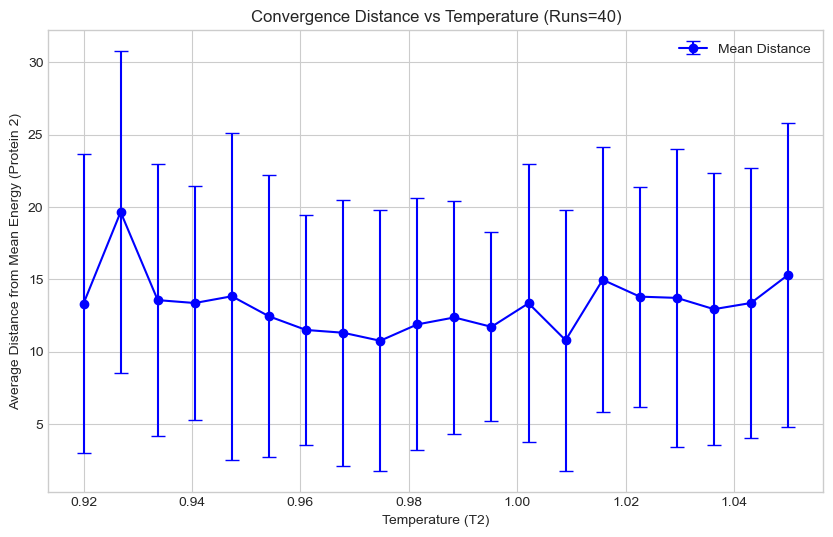

In [22]:
Temps = np.linspace(0.92,1.05,20)
# Initialize storage for average distances and standard deviations
avg_distances = []
std_distances = []

print(f"Starting temperature scan with {len(Temps)} temperatures and {no_runs} runs each...")

# Loop through temperatures
for temp in Temps:
    distances = []
    
    # Loop through runs for this temperature
    for run in range(no_runs):
        initial_seq = og.initial_seq_no_stops(prot1_len, prot2_len, Temp_overlap, quiet=True)

        final_seq, accepted, hist_e1, hist_e2, final_Es = og.overlapped_sequence_generator_int(
            dca_params_1, dca_params_2, initial_seq, 
            numberofiterations=Temp_iters, 
            whentosave=0.1, 
            quiet=True,
            T1=hi_T, T2=temp)

        # Calculate distance from mean energy of Protein 2
        dist = np.absolute(mean_e2 - final_Es[1])
        distances.append(dist)
    
    # Calculate and store the average and standard deviation for this temperature
    avg_dist = np.mean(distances)
    std_dist = np.std(distances)
    
    avg_distances.append(avg_dist)
    std_distances.append(std_dist)
    
    print(f"Temp {temp:.4f}: Average Dist = {avg_dist:.4f} +/- {std_dist:.4f}")

# Plot the results with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(Temps, avg_distances, yerr=std_distances, marker='o', linestyle='-', color='b', capsize=5, label='Mean Distance')
plt.xlabel('Temperature (T2)')
plt.ylabel('Average Distance from Mean Energy (Protein 2)')
plt.title(f'Convergence Distance vs Temperature (Runs={no_runs})')
plt.grid(True)
plt.legend()
plt.show()

Starting temperature scan for PF00004 (20 temps, 40 runs/temp)...
T=0.7000: Mean Dist=30.25
T=0.7132: Mean Dist=27.24
T=0.7263: Mean Dist=29.42
T=0.7395: Mean Dist=24.79
T=0.7526: Mean Dist=19.13
T=0.7658: Mean Dist=20.78
T=0.7789: Mean Dist=16.96
T=0.7921: Mean Dist=18.65
T=0.8053: Mean Dist=13.76
T=0.8184: Mean Dist=11.63
T=0.8316: Mean Dist=12.84
T=0.8447: Mean Dist=11.45
T=0.8579: Mean Dist=12.75
T=0.8711: Mean Dist=13.94
T=0.8842: Mean Dist=19.36
T=0.8974: Mean Dist=20.19
T=0.9105: Mean Dist=24.74
T=0.9237: Mean Dist=28.75
T=0.9368: Mean Dist=35.42
T=0.9500: Mean Dist=45.02


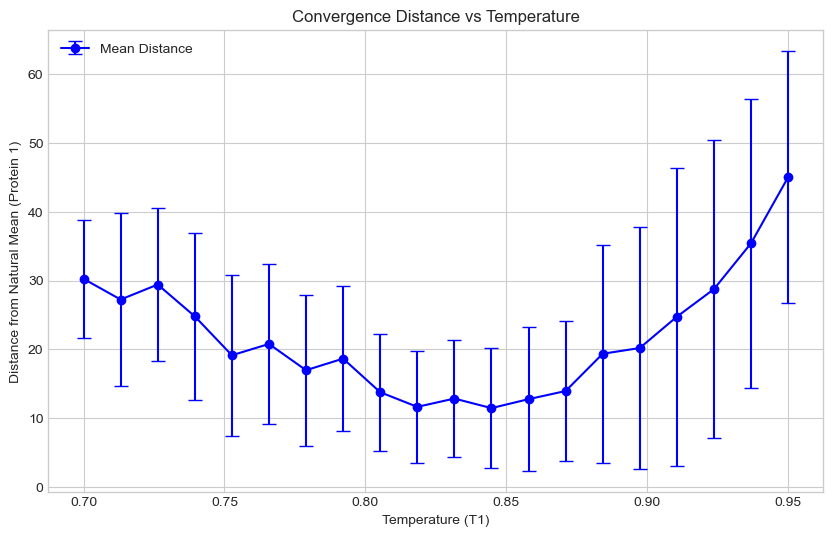

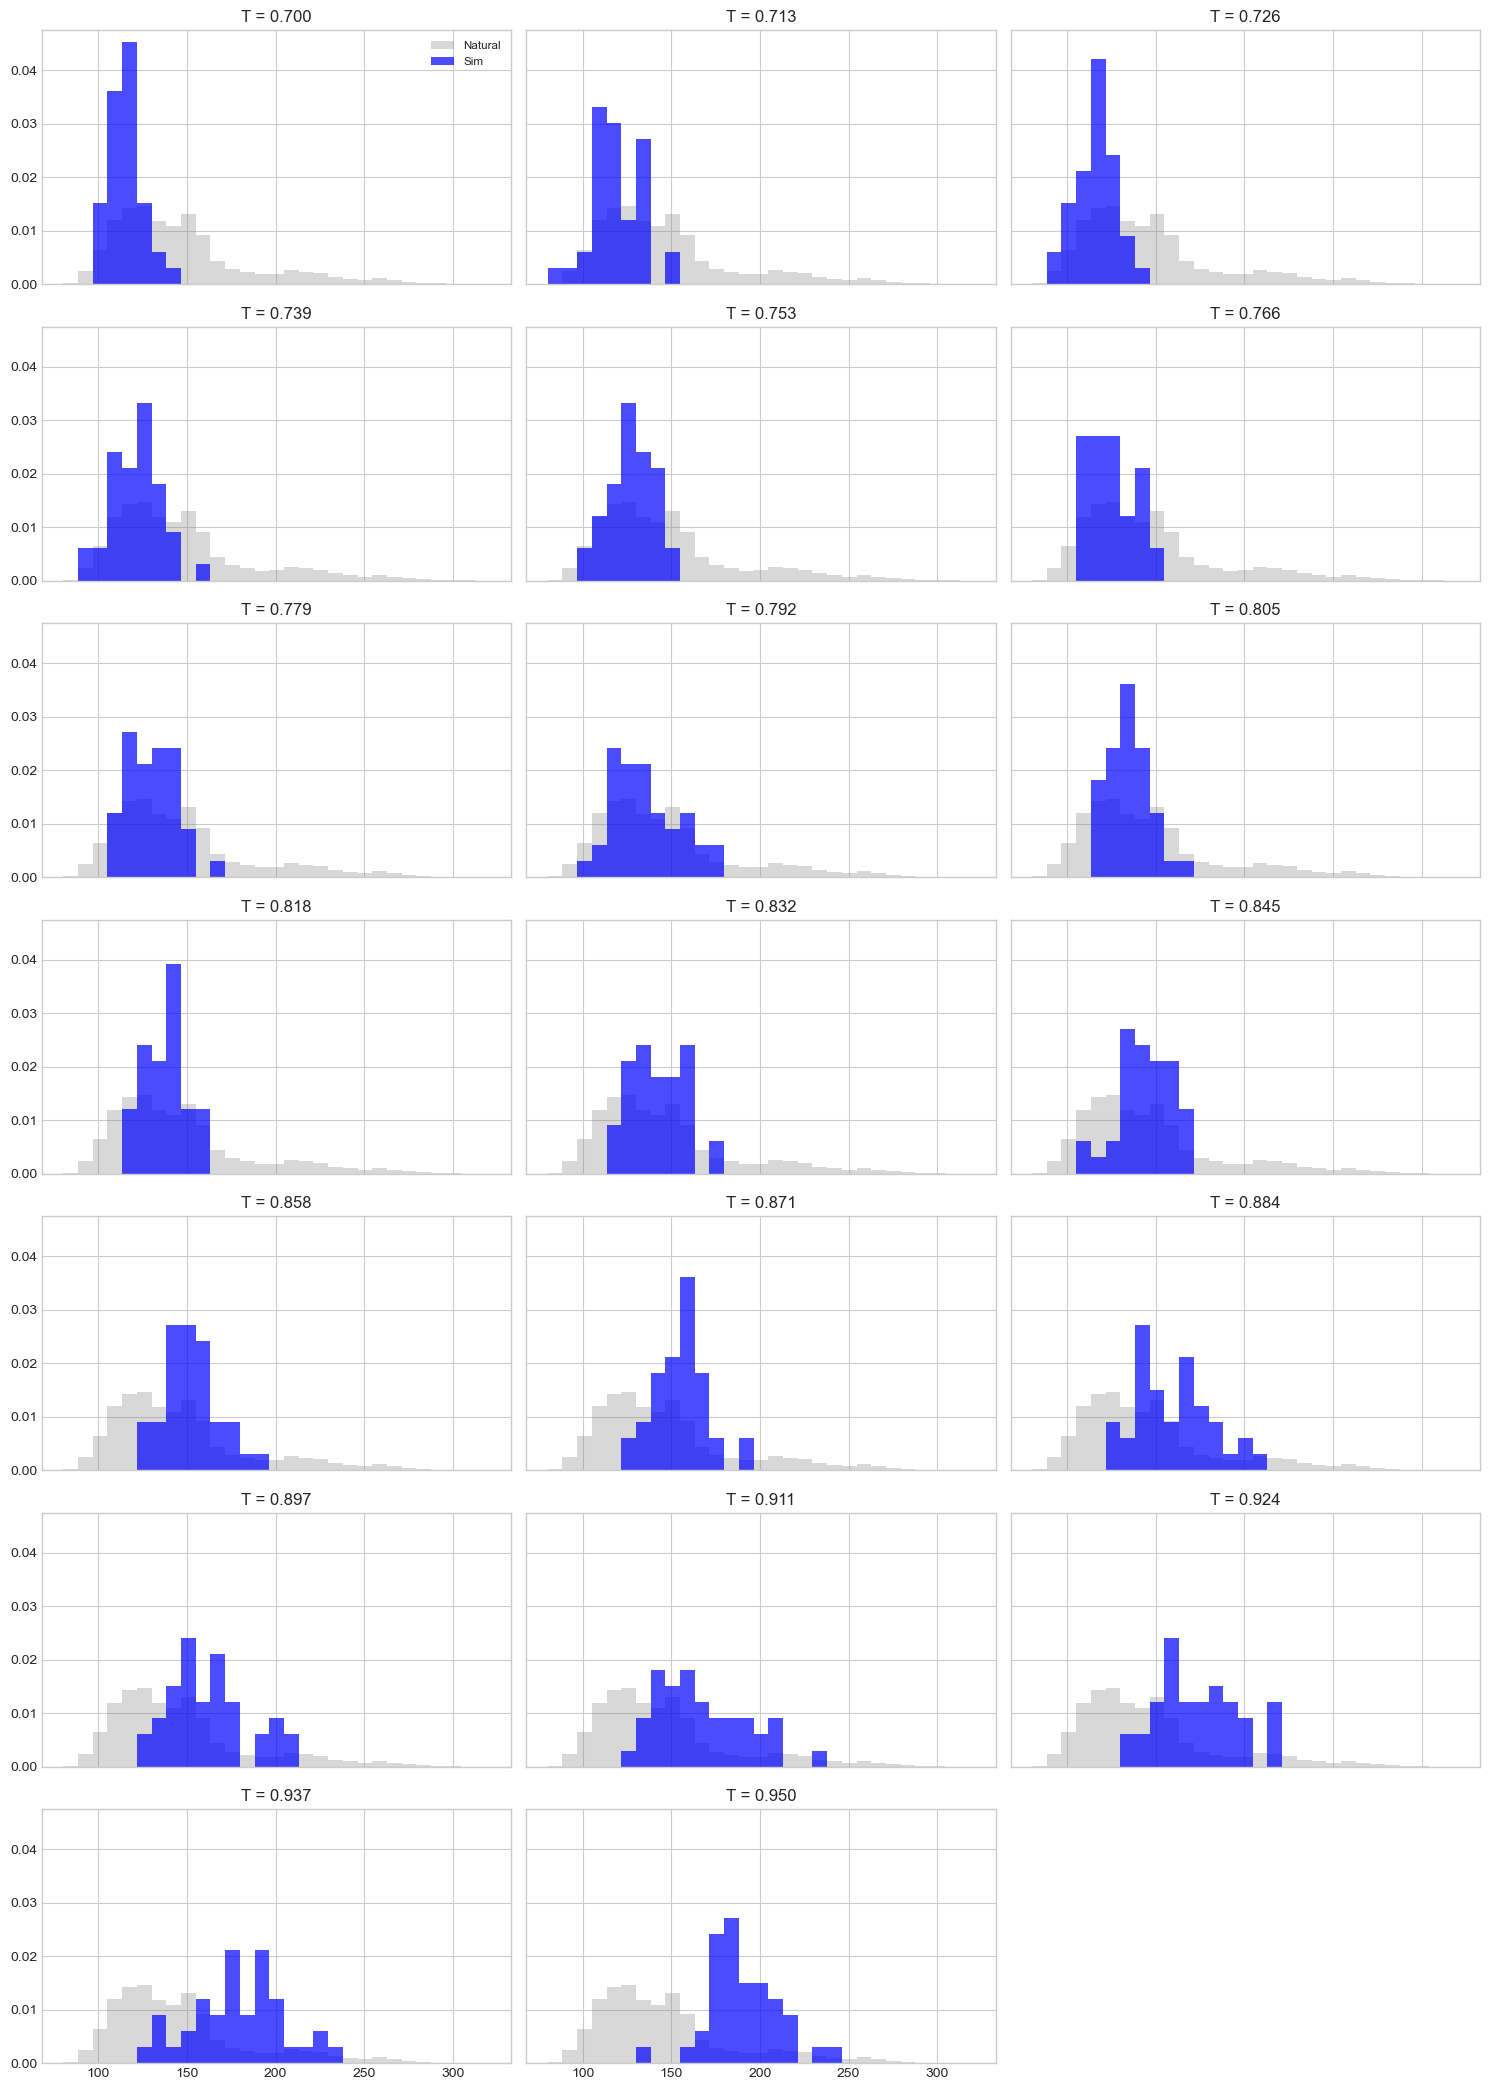

In [26]:
# --- Configuration ---
Temps = np.linspace(0.7,0.95,20)
Temp_overlap = 60
hi_T = 1000
no_runs = 40
Temp_iters = 250000

# 1. Load Natural Energies for Protein 1 (PF00004) for Histogram comparison
base_dir = os.getcwd()
pf_name_1 = "PF00004"
nat_energies_path_1 = os.path.join(base_dir, pf_name_1, f"{pf_name_1}_naturalenergies.txt")
natural_energies_1 = og.load_natural_energies(nat_energies_path_1)
nat_mean_1 = np.mean(natural_energies_1)

# Results Storage
avg_distances = []
std_distances = []
all_final_energies = [] # Stores full list of energies for histograms

print(f"Starting temperature scan for {pf_name_1} ({len(Temps)} temps, {no_runs} runs/temp)...")

# 2. Simulation Loop
for temp in Temps:
    run_energies = []
    run_distances = []
    
    for run in range(no_runs):
        initial_seq = og.initial_seq_no_stops(prot1_len, prot2_len, Temp_overlap, quiet=True)

        # Protein 1 varies (T1=temp), Protein 2 is loose (T2=hi_T)
        final_seq, accepted, hist_e1, hist_e2, final_Es = og.overlapped_sequence_generator_int(
            dca_params_1, dca_params_2, initial_seq, 
            numberofiterations=Temp_iters, 
            whentosave=0.1, 
            quiet=True,
            T1=temp, T2=hi_T)

        energy = final_Es[0]
        distance = np.absolute(nat_mean_1 - energy)
        
        run_energies.append(energy)
        run_distances.append(distance)

    # Store stats for the Distance Line Plot
    avg_distances.append(np.mean(run_distances))
    std_distances.append(np.std(run_distances))
    
    # Store full energy data for the Histograms
    all_final_energies.append(np.array(run_energies))
    
    print(f"T={temp:.4f}: Mean Dist={np.mean(run_distances):.2f}")

# 3. Plot 1: Average Distance vs Temperature
plt.figure(figsize=(10, 6))

plt.errorbar(Temps, avg_distances, yerr=std_distances, fmt='o-', color='b', capsize=5, label='Mean Distance')

plt.xlabel('Temperature (T1)')
plt.ylabel('Distance from Natural Mean (Protein 1)')
plt.title(f'Convergence Distance vs Temperature')
plt.legend()
plt.grid(True)
plt.show()

# 4. Plot 2: Histograms of Energies at Each Temperature
# Create a grid of subplots
cols = 3
rows = int(np.ceil(len(Temps) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(15, 3*rows), sharex=True, sharey=True)
axes = axes.flatten()

# Determine consistent bins across all plots
all_data_flat = np.concatenate(all_final_energies)
min_e = min(np.min(natural_energies_1), np.min(all_data_flat))
max_e = max(np.max(natural_energies_1), np.max(all_data_flat))
bins = np.linspace(min_e, max_e, 30)

for i, temp in enumerate(Temps):
    ax = axes[i]
    
    # Natural Energy Background (Grey)
    ax.hist(natural_energies_1, bins=bins, density=True, alpha=0.3, color='grey', label='Natural')
    
    # Simulated Energy (Blue)
    ax.hist(all_final_energies[i], bins=bins, density=True, alpha=0.7, color='blue', label='Sim')
    
    ax.set_title(f'T = {temp:.3f}')
    
    # Only show legend on first plot
    if i == 0:
        ax.legend(loc='upper right', fontsize='small')

# Hide empty subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Starting temperature scan for PF00041 (20 temps, 40 runs/temp)...
T=0.8700: Mean Dist=29.05
T=0.8821: Mean Dist=25.62
T=0.8942: Mean Dist=22.43
T=0.9063: Mean Dist=20.41
T=0.9184: Mean Dist=16.89
T=0.9305: Mean Dist=16.72
T=0.9426: Mean Dist=13.53
T=0.9547: Mean Dist=9.96
T=0.9668: Mean Dist=11.06
T=0.9789: Mean Dist=13.83
T=0.9911: Mean Dist=11.89
T=1.0032: Mean Dist=11.64
T=1.0153: Mean Dist=14.73
T=1.0274: Mean Dist=11.64
T=1.0395: Mean Dist=9.89
T=1.0516: Mean Dist=16.37
T=1.0637: Mean Dist=15.89
T=1.0758: Mean Dist=17.36
T=1.0879: Mean Dist=19.35
T=1.1000: Mean Dist=23.45


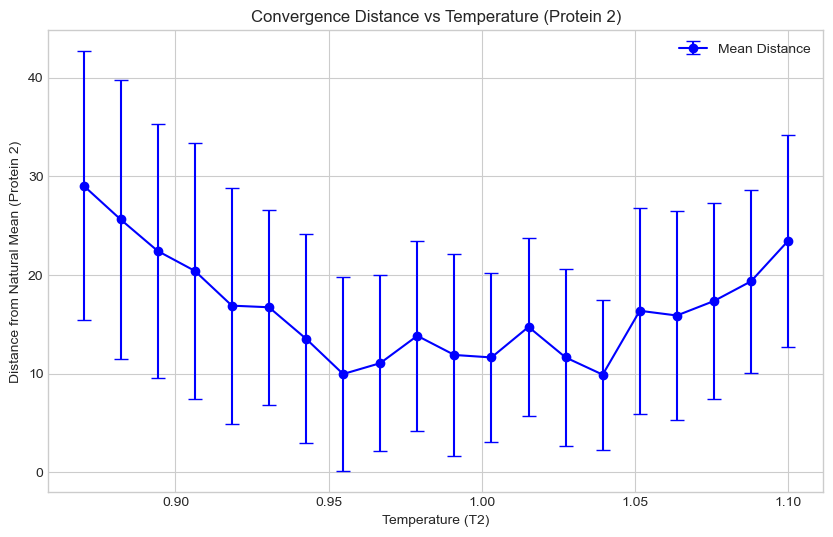

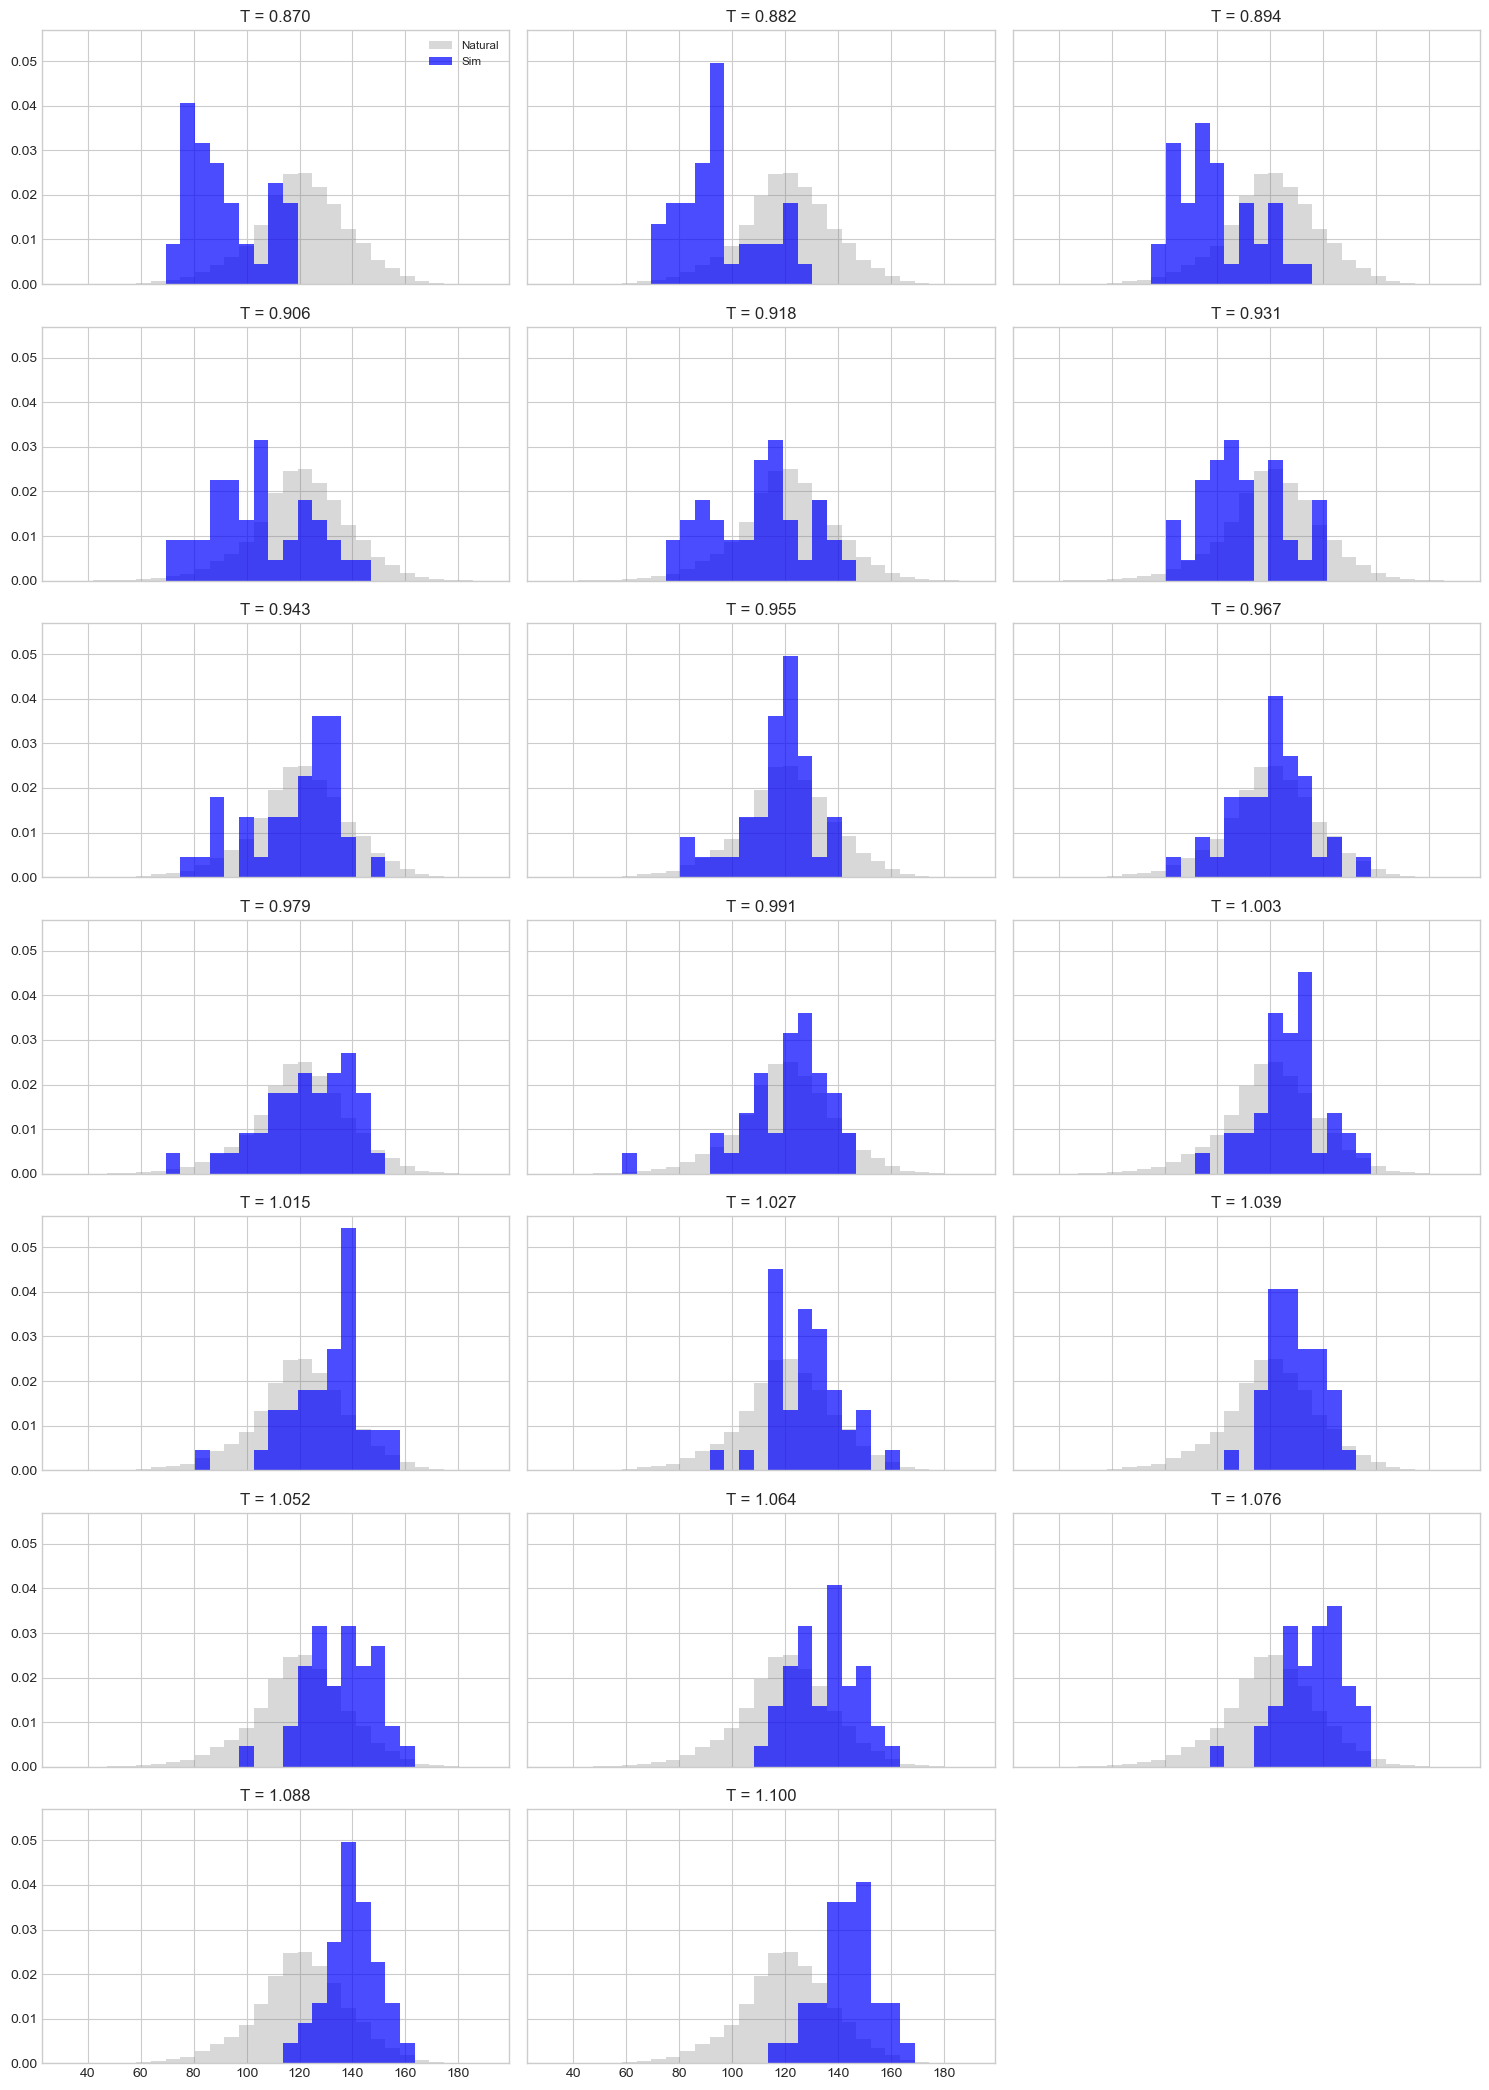

In [28]:
# --- Configuration ---
Temps = np.linspace(0.87,1.1,20)
Temp_overlap = 60
hi_T = 1000
no_runs = 40
Temp_iters = 250000

# 1. Load Natural Energies for Protein 2 (PF00041) for Histogram comparison
base_dir = os.getcwd()
pf_name_2 = "PF00041"
nat_energies_path_2 = os.path.join(base_dir, pf_name_2, f"{pf_name_2}_naturalenergies.txt")
natural_energies_2 = og.load_natural_energies(nat_energies_path_2)
nat_mean_2 = np.mean(natural_energies_2)

# Results Storage
avg_distances = []
std_distances = []
all_final_energies = [] # Stores full list of energies for histograms

print(f"Starting temperature scan for {pf_name_2} ({len(Temps)} temps, {no_runs} runs/temp)...")

# 2. Simulation Loop
for temp in Temps:
    run_energies = []
    run_distances = []
    
    for run in range(no_runs):
        initial_seq = og.initial_seq_no_stops(prot1_len, prot2_len, Temp_overlap, quiet=True)

        # Protein 2 varies (T2=temp)    , Protein 1 is loose (T1=hi_T)
        final_seq, accepted, hist_e1, hist_e2, final_Es = og.overlapped_sequence_generator_int(
            dca_params_1, dca_params_2, initial_seq, 
            numberofiterations=Temp_iters, 
            whentosave=0.1, 
            quiet=True,
            T1=hi_T, T2=temp)

        energy = final_Es[1]
        distance = np.absolute(nat_mean_2 - energy)
        
        run_energies.append(energy)
        run_distances.append(distance)

    # Store stats for the Distance Line Plot
    avg_distances.append(np.mean(run_distances))
    std_distances.append(np.std(run_distances))
    
    # Store full energy data for the Histograms
    all_final_energies.append(np.array(run_energies))
    
    print(f"T={temp:.4f}: Mean Dist={np.mean(run_distances):.2f}")

# 3. Plot 1: Average Distance vs Temperature
plt.figure(figsize=(10, 6))

plt.errorbar(Temps, avg_distances, yerr=std_distances, fmt='o-', color='b', capsize=5, label='Mean Distance')

plt.xlabel('Temperature (T2)')
plt.ylabel('Distance from Natural Mean (Protein 2)')
plt.title(f'Convergence Distance vs Temperature (Protein 2)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Plot 2: Histograms of Energies at Each Temperature
# Create a grid of subplots
cols = 3
rows = int(np.ceil(len(Temps) / cols))
fig, axes = plt.subplots(rows, cols, figsize=(15, 3*rows), sharex=True, sharey=True)
axes = axes.flatten()

# Determine consistent bins across all plots (Using natural_energies_2)
all_data_flat = np.concatenate(all_final_energies)
min_e = min(np.min(natural_energies_2), np.min(all_data_flat))
max_e = max(np.max(natural_energies_2), np.max(all_data_flat))
bins = np.linspace(min_e, max_e, 30)

for i, temp in enumerate(Temps):
    ax = axes[i]
    
    # Natural Energy Background (Grey) using natural_energies_2
    ax.hist(natural_energies_2, bins=bins, density=True, alpha=0.3, color='grey', label='Natural')
    
    # Simulated Energy (Blue)
    ax.hist(all_final_energies[i], bins=bins, density=True, alpha=0.7, color='blue', label='Sim')
    
    ax.set_title(f'T = {temp:.3f}')
    
    # Only show legend on first plot
    if i == 0:
        ax.legend(loc='upper right', fontsize='small')

# Hide empty subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()